In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsapi

# import torch
# import torch.nn as nn
# import torch.nn.functional as F
# from torch.utils import data

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score

import warnings
warnings.filterwarnings('ignore')

In [2]:
import datetime

yesterday = (datetime.datetime.today() - datetime.timedelta(days = 1)).strftime("%m_%d_%Y")
today = datetime.datetime.today().strftime("%m_%d_%Y")

In [3]:
hits = pd.concat([pd.read_csv("player_stats_08_06_2019.csv"),
                  pd.read_csv("player_stats_08_05_2019.csv"),
                 ], sort=False)

In [4]:
hits.set_index(np.arange(len(hits)), inplace=True)

In [5]:
hits['player_got_hit'] = hits['player_got_hit'].apply(float)

In [6]:
hits

,Name,ID,Team,gamesPlayed,groundOuts,runs,doubles,triples,homeRuns,strikeOuts,...,whip_p5G,winPercentage_p5G,atBats_h2h,avg_h2h,hits_h2h,obp_h2h,ops_h2h,slg_h2h,pitcher_hitter_opposite_hand,player_got_hit
0,Brandon Dixon,641525,116,81.0,46.0,32.0,12.0,3.0,14.0,87.0,...,1.54,0.2,5.0,0.200,1.0,0.333,0.933,0.600,0.0,1.0
1,Dawel Lugo,608475,116,31.0,31.0,6.0,0.0,3.0,1.0,21.0,...,1.54,0.2,3.0,0.333,1.0,0.333,0.666,0.333,0.0,1.0
2,Gordon Beckham,493596,116,66.0,41.0,22.0,11.0,2.0,5.0,60.0,...,1.54,0.2,0.0,0.000,0.0,0.000,0.000,0.000,0.0,0.0
3,Harold Castro,605612,116,55.0,60.0,17.0,6.0,3.0,2.0,49.0,...,1.54,0.2,6.0,0.500,3.0,0.500,1.000,0.500,1.0,1.0
4,JaCoby Jones,592444,116,87.0,66.0,39.0,19.0,3.0,11.0,93.0,...,1.54,0.2,6.0,0.000,0.0,0.000,0.000,0.000,0.0,1.0
5,Jake Rogers,668670,116,7.0,5.0,5.0,0.0,0.0,2.0,8.0,...,1.54,0.2,2.0,0.500,1.0,0.500,2.500,2.000,0.0,1.0
6,John Hicks,543308,116,69.0,55.0,19.0,11.0,0.0,7.0,74.0,...,1.54,0.2,5.0,0.200,1.0,0.200,0.400,0.200,0.0,1.0
7,Jordy Mercer,474568,116,42.0,40.0,11.0,8.0,0.0,5.0,29.0,...,1.54,0.2,1.0,0.000,0.0,0.500,0.500,0.000,0.0,0.0
8,Miguel Cabrera,408234,116,100.0,93.0,29.0,16.0,0.0,7.0,79.0,...,1.54,0.2,0.0,0.000,0.0,0.000,0.000,0.000,0.0,0.0
9,Niko Goodrum,592348,116,101.0,71.0,54.0,24.0,4.0,10.0,123.0,...,1.54,0.2,3.0,0.333,1.0,0.600,1.267,0.667,1.0,1.0


In [7]:
data = hits.iloc[:, 3:-1]
data

,gamesPlayed,groundOuts,runs,doubles,triples,homeRuns,strikeOuts,baseOnBalls,intentionalWalks,hits,...,walksPer9Inn_p5G,whip_p5G,winPercentage_p5G,atBats_h2h,avg_h2h,hits_h2h,obp_h2h,ops_h2h,slg_h2h,pitcher_hitter_opposite_hand
0,81.0,46.0,32.0,12.0,3.0,14.0,87.0,15.0,0.0,70.0,...,3.54,1.54,0.2,5.0,0.200,1.0,0.333,0.933,0.600,0.0
1,31.0,31.0,6.0,0.0,3.0,1.0,21.0,2.0,0.0,20.0,...,3.54,1.54,0.2,3.0,0.333,1.0,0.333,0.666,0.333,0.0
2,66.0,41.0,22.0,11.0,2.0,5.0,60.0,12.0,0.0,38.0,...,3.54,1.54,0.2,0.0,0.000,0.0,0.000,0.000,0.000,0.0
3,55.0,60.0,17.0,6.0,3.0,2.0,49.0,6.0,0.0,55.0,...,3.54,1.54,0.2,6.0,0.500,3.0,0.500,1.000,0.500,1.0
4,87.0,66.0,39.0,19.0,3.0,11.0,93.0,27.0,2.0,70.0,...,3.54,1.54,0.2,6.0,0.000,0.0,0.000,0.000,0.000,0.0
5,7.0,5.0,5.0,0.0,0.0,2.0,8.0,4.0,0.0,5.0,...,3.54,1.54,0.2,2.0,0.500,1.0,0.500,2.500,2.000,0.0
6,69.0,55.0,19.0,11.0,0.0,7.0,74.0,12.0,0.0,48.0,...,3.54,1.54,0.2,5.0,0.200,1.0,0.200,0.400,0.200,0.0
7,42.0,40.0,11.0,8.0,0.0,5.0,29.0,8.0,1.0,36.0,...,3.54,1.54,0.2,1.0,0.000,0.0,0.500,0.500,0.000,0.0
8,100.0,93.0,29.0,16.0,0.0,7.0,79.0,32.0,2.0,104.0,...,3.54,1.54,0.2,0.0,0.000,0.0,0.000,0.000,0.000,0.0
9,101.0,71.0,54.0,24.0,4.0,10.0,123.0,43.0,1.0,96.0,...,3.54,1.54,0.2,3.0,0.333,1.0,0.600,1.267,0.667,1.0


In [8]:
labels = hits.iloc[:, -1]
labels

0      1.0
1      1.0
2      0.0
3      1.0
4      1.0
5      1.0
6      1.0
7      0.0
8      0.0
9      1.0
10     0.0
11     1.0
12     1.0
13     0.0
14     0.0
15     0.0
16     1.0
17     1.0
18     0.0
19     1.0
20     1.0
21     1.0
22     1.0
23     1.0
24     1.0
25     1.0
26     1.0
27     1.0
28     1.0
29     0.0
      ... 
699    0.0
700    1.0
701    0.0
702    1.0
703    0.0
704    1.0
705    0.0
706    0.0
707    0.0
708    1.0
709    1.0
710    1.0
711    1.0
712    1.0
713    1.0
714    0.0
715    0.0
716    0.0
717    0.0
718    1.0
719    0.0
720    1.0
721    0.0
722    0.0
723    0.0
724    0.0
725    0.0
726    0.0
727    0.0
728    0.0
Name: player_got_hit, Length: 729, dtype: float64

In [9]:
# data_train, data_test, labels_train, labels_test = train_test_split(data, labels, test_size=0.2)
data_train, data_val, labels_train, labels_val = train_test_split(data, labels, test_size=0.2)

In [10]:
np.mean(labels_train == 0)

0.483704974271012

In [11]:
np.mean(labels_train == 1)

0.516295025728988

In [12]:
hits.columns

Index(['Name', 'ID', 'Team', 'gamesPlayed', 'groundOuts', 'runs', 'doubles',
       'triples', 'homeRuns', 'strikeOuts', 'baseOnBalls', 'intentionalWalks',
       'hits', 'hitByPitch', 'avg', 'atBats', 'obp', 'slg', 'ops',
       'caughtStealing', 'stolenBases', 'stolenBasePercentage',
       'groundIntoDoublePlay', 'numberOfPitches', 'plateAppearances',
       'totalBases', 'rbi', 'leftOnBase', 'sacBunts', 'sacFlies', 'babip',
       'groundOutsToAirouts', 'atBatsPerHomeRun', 'atBatsPerHomeRun_p7G',
       'avg_p7G', 'hits_p7G', 'obp_p7G', 'ops_p7G', 'slg_p7G',
       'atBatsPerHomeRun_p15G', 'avg_p15G', 'hits_p15G', 'obp_p15G',
       'ops_p15G', 'slg_p15G', 'avg_p5G', 'era_p5G', 'groundOutsToAirouts_p5G',
       'hitsPer9Inn_p5G', 'homeRunsPer9_p5G', 'inningsPitched_p5G',
       'pitchesPerInning_p5G', 'runsScoredPer9_p5G',
       'stolenBasePercentage_p5G', 'strikePercentage_p5G',
       'strikeoutWalkRatio_p5G', 'strikeoutsPer9Inn_p5G', 'walksPer9Inn_p5G',
       'whip_p5G', 'winP

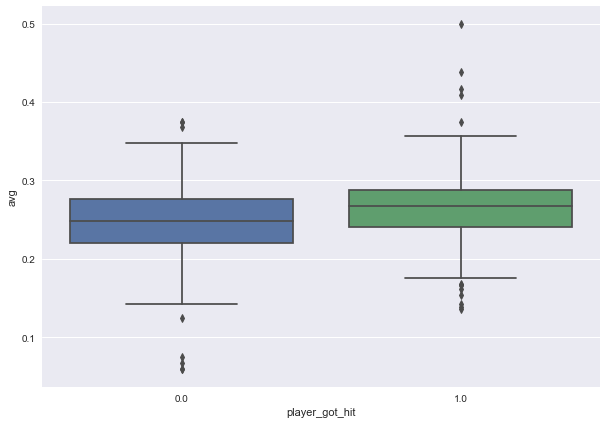

In [13]:
plt.figure(figsize=(10, 7))
sns.boxplot(x = "player_got_hit", y = "avg", data=hits)

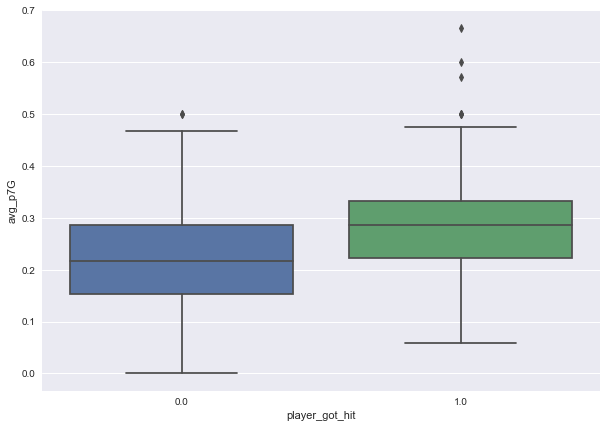

In [14]:
plt.figure(figsize=(10, 7))
sns.boxplot(x = "player_got_hit", y = "avg_p7G", data=hits)

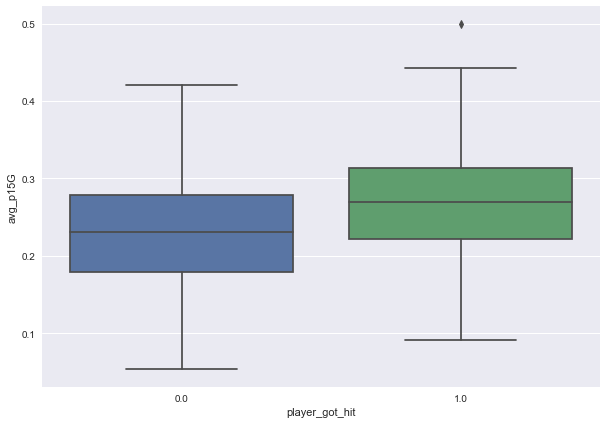

In [15]:
plt.figure(figsize=(10, 7))
sns.boxplot(x = "player_got_hit", y = "avg_p15G", data=hits)

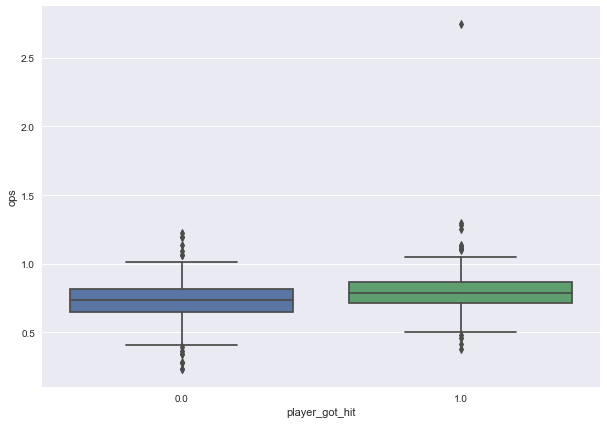

In [16]:
plt.figure(figsize=(10, 7))
sns.boxplot(x = "player_got_hit", y = "ops", data=hits)

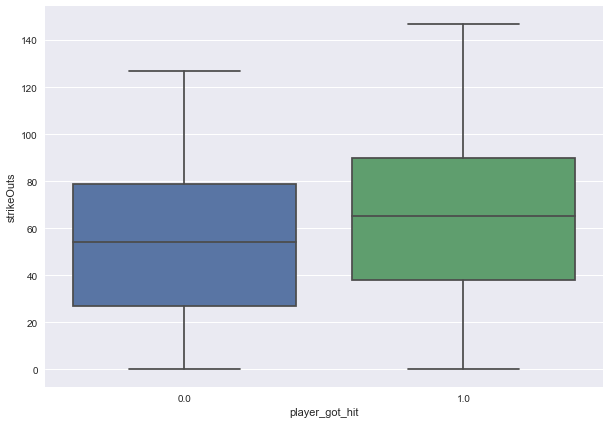

In [17]:
plt.figure(figsize=(10, 7))
sns.boxplot(x = "player_got_hit", y = "strikeOuts", data=hits)

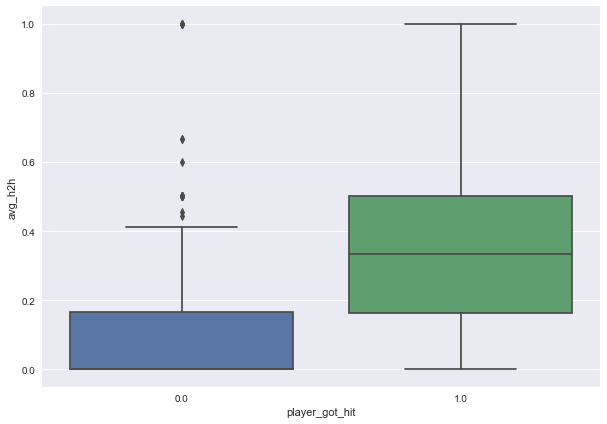

In [18]:
plt.figure(figsize=(10, 7))
sns.boxplot(x = "player_got_hit", y = "avg_h2h", data=hits)

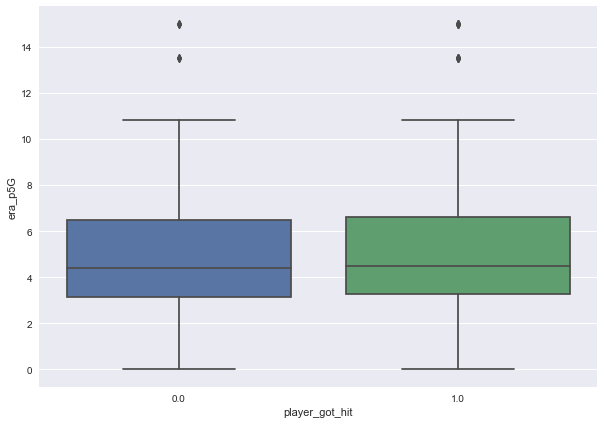

In [19]:
plt.figure(figsize=(10, 7))
sns.boxplot(x = "player_got_hit", y = "era_p5G", data=hits)

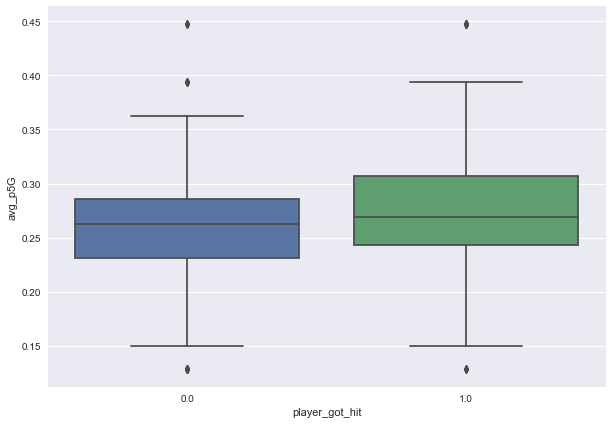

In [20]:
plt.figure(figsize=(10, 7))
sns.boxplot(x = "player_got_hit", y = "avg_p5G", data=hits)

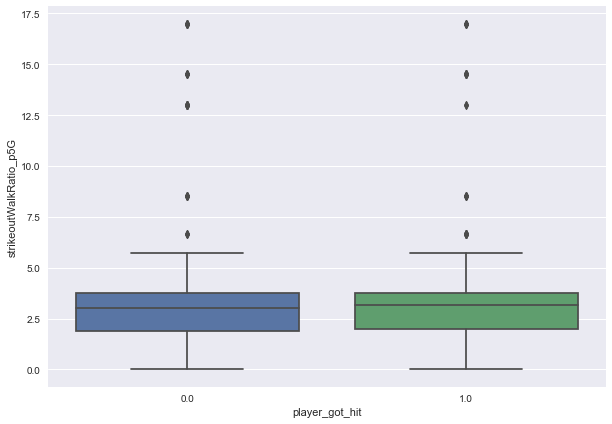

In [21]:
plt.figure(figsize=(10, 7))
sns.boxplot(x = "player_got_hit", y = "strikeoutWalkRatio_p5G", data=hits)

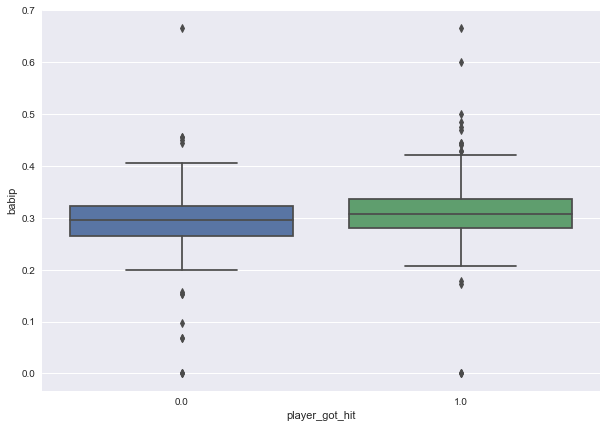

In [22]:
plt.figure(figsize=(10, 7))
sns.boxplot(x = "player_got_hit", y = "babip", data=hits)

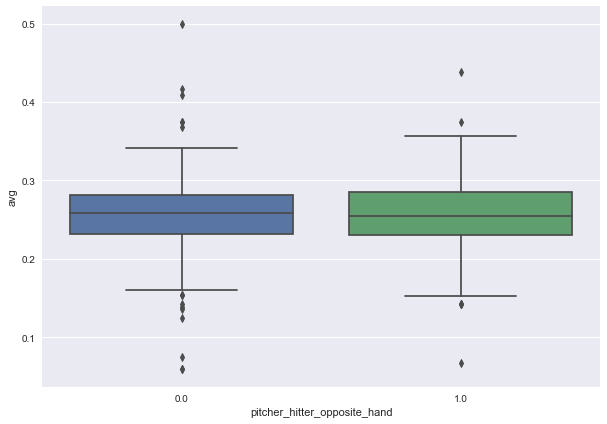

In [23]:
plt.figure(figsize=(10, 7))
sns.boxplot(x = "pitcher_hitter_opposite_hand", y = "avg", data=hits)

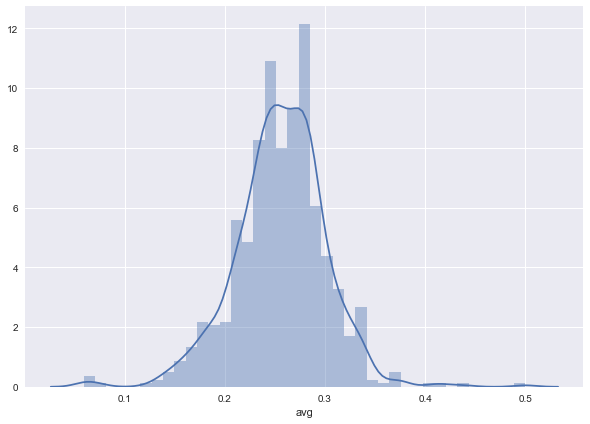

In [24]:
plt.figure(figsize=(10, 7))
sns.distplot(hits['avg'])

In [25]:
logreg = LogisticRegression(penalty='l2').fit(data_train, labels_train)

In [26]:
np.mean(logreg.predict(data_train) == labels_train)

0.7770154373927959

In [27]:
np.mean(logreg.predict(data_val) == labels_val)

0.7671232876712328

In [28]:
hits.take(data_val.take(np.argsort(logreg.predict_proba(data_val)[:, 1])[::-1][:20]).index)['Name']

287            Ozzie Albies
270         Jonathan Schoop
425          Brian Anderson
426           Bryan Holaday
158            Cavan Biggio
531              Mike Trout
658              Alex Avila
475           Austin Romine
33             Niko Goodrum
221             Javier Baez
308         Corey Dickerson
650         Freddie Freeman
9              Niko Goodrum
597            Elvis Andrus
687               Joe Panik
49           Bryan Reynolds
616    Nicholas Castellanos
295           David Peralta
258           Nolan Arenado
607          Willie Calhoun
Name: Name, dtype: object

In [29]:
hits_test = pd.read_csv("player_stats_{}.csv".format(today))
hits_test.head()

,Name,ID,Team,gamesPlayed,groundOuts,runs,doubles,triples,homeRuns,strikeOuts,...,walksPer9Inn_p5G,whip_p5G,winPercentage_p5G,atBats_h2h,avg_h2h,hits_h2h,obp_h2h,ops_h2h,slg_h2h,pitcher_hitter_opposite_hand
0,Bo Bichette,666182,141,10.0,8.0,6.0,8.0,0.0,3.0,10.0,...,1.61,1.07,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Brandon Drury,592273,141,88.0,82.0,34.0,15.0,1.0,13.0,87.0,...,1.61,1.07,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Cavan Biggio,624415,141,59.0,37.0,38.0,7.0,0.0,10.0,69.0,...,1.61,1.07,1.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0
3,Danny Jansen,643376,141,87.0,72.0,29.0,12.0,1.0,9.0,66.0,...,1.61,1.07,1.0,2.0,0.5,1.0,0.5,1.0,0.5,0.0
4,Derek Fisher,605233,141,23.0,20.0,10.0,2.0,1.0,2.0,20.0,...,1.61,1.07,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [30]:
data_test = hits_test.iloc[:, 3:]

In [31]:
hits_test.take(np.argsort(logreg.predict_proba(data_test)[:, 1])[::-1][:15])['Name']

18          DJ LeMahieu
189        Trevor Story
180    Charlie Blackmon
136        Jason Kipnis
118     Whit Merrifield
183     Garrett Hampson
113       Hunter Dozier
116         Nicky Lopez
88          Javier Baez
98        Harold Castro
114         Jorge Soler
120       Eddie Rosario
131         Nelson Cruz
45     Ronald Acuna Jr.
44         Ozzie Albies
Name: Name, dtype: object

In [32]:
precision_score(labels_val, logreg.predict(data_val))

0.7936507936507936

In [33]:
recall_score(labels_val, logreg.predict(data_val))

0.704225352112676

In [34]:
f1_score(labels_val, logreg.predict(data_val))

0.7462686567164178

## Gradient boosted decision trees??

In [35]:
from sklearn.ensemble import AdaBoostClassifier

In [36]:
boosted_dt = AdaBoostClassifier()
boosted_dt.fit(data_train, labels_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=50, random_state=None)

In [37]:
np.mean(boosted_dt.predict(data_val) == labels_val)

0.7397260273972602

In [38]:
hits_test.take(np.argsort(boosted_dt.predict_proba(data_test)[:, 1])[::-1][:10])['Name']

45     Ronald Acuna Jr.
88          Javier Baez
18          DJ LeMahieu
44         Ozzie Albies
40      Freddie Freeman
159        Bryce Harper
114         Jorge Soler
118     Whit Merrifield
73       Eugenio Suarez
58      Xander Bogaerts
Name: Name, dtype: object

In [39]:
precision_score(labels_val, boosted_dt.predict(data_val))

0.7391304347826086

In [40]:
recall_score(labels_val, boosted_dt.predict(data_val))

0.7183098591549296

In [41]:
f1_score(labels_val, boosted_dt.predict(data_val))

0.7285714285714284

## Random forests...

In [42]:
from sklearn.ensemble import RandomForestClassifier

In [101]:
# Tuning hyperparameters for random forests
# Note that cross-validation is sort of "automatically" done because 
# sklearn's implementation of random forests uses bagging for each 
# estimator -- more details here 
# https://scikit-learn.org/stable/modules/grid_search.html#out-of-bag-estimates

from sklearn.model_selection import GridSearchCV

param_grid = [
    {'criterion': ['gini'], 'max_depth': [20], 'min_samples_leaf': [4, 10, 20, 30],
    'n_estimators': [50, 75, 100, 125, 150]}
]

In [58]:
rf_cv = GridSearchCV(RandomForestClassifier(), param_grid, cv=4)
rf_cv.fit(data_train, labels_train)

GridSearchCV(cv=4, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid=[{'criterion': ['gini'], 'max_depth': [20], 'min_samples_leaf': [4, 10, 20, 30], 'n_estimators': [50, 75, 100, 125, 150]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [59]:
rf_cv.best_params_

{'criterion': 'gini',
 'max_depth': 20,
 'min_samples_leaf': 10,
 'n_estimators': 150}

The best parameters seem to be a Gini score criterion, a max depth per tree of 20, a minimum of 10 points per leaf node, and 100 estimators.

In [43]:
rf_classifier = RandomForestClassifier(n_estimators=150, criterion='gini', max_depth=20, min_samples_leaf=10)
rf_classifier.fit(data_train, labels_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=20, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=10,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=150, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [44]:
np.mean(rf_classifier.predict(data_val) == labels_val)

0.7876712328767124

In [45]:
predictions = hits_test.take(np.argsort(rf_classifier.predict_proba(data_test)[:, 1])[::-1][:10])[['Name', 'Team']].reset_index().iloc[:, 1:]
predictions.columns = ["name", "team_id"]
predictions["team_name"] = predictions['team_id'].apply(lambda x: statsapi.lookup_team(x)[0]['name'])
predictions["hit_probability"] = np.sort(rf_classifier.predict_proba(data_test)[:, 1])[::-1][:10]
predictions.to_csv("predictions_{}.csv".format(today))

In [46]:
predictions

,name,team_id,team_name,hit_probability
0,Trevor Story,115,Colorado Rockies,0.940929
1,DJ LeMahieu,147,New York Yankees,0.933589
2,Nolan Arenado,115,Colorado Rockies,0.924653
3,Jorge Soler,118,Kansas City Royals,0.917335
4,Freddie Freeman,144,Atlanta Braves,0.916914
5,Ronald Acuna Jr.,144,Atlanta Braves,0.916489
6,Ryan McMahon,115,Colorado Rockies,0.915122
7,Charlie Blackmon,115,Colorado Rockies,0.915082
8,Mike Trout,108,Los Angeles Angels,0.892562
9,Jason Kipnis,114,Cleveland Indians,0.868272


In [47]:
precision_score(labels_val, rf_classifier.predict(data_val))

0.7777777777777778

In [48]:
recall_score(labels_val, rf_classifier.predict(data_val))

0.7887323943661971

In [49]:
f1_score(labels_val, rf_classifier.predict(data_val))

0.7832167832167832

## K-NN, because why not

In [64]:
from sklearn.neighbors import KNeighborsClassifier

In [65]:
# TODO: tune hyperparameters
knn_clf = KNeighborsClassifier(n_neighbors=7)
knn_clf.fit(data_train, labels_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=7, p=2,
           weights='uniform')

In [66]:
np.mean(knn_clf.predict(data_val) == labels_val)

0.6363636363636364

In [67]:
hits_test.take(np.argsort(knn_clf.predict_proba(data_test)[:, 1])[::-1][:10])['Name']

135      Austin Meadows
347        Kole Calhoun
191        Josh Reddick
328    Christian Yelich
253         Tommy Edman
109      Starlin Castro
146     Travis d'Arnaud
321       Marcus Semien
34        Scott Kingery
107        Miguel Rojas
Name: Name, dtype: object

## Now the fun begins

In [ ]:
num_rows = len(data)
num_feats = len(np.transpose(data))
print(num_rows)
print(num_feats)

### Convert our arrays to torch tensors

In [ ]:
data_train_t = torch.from_numpy(np.array(data_train)).type(torch.FloatTensor)
data_val_t = torch.from_numpy(np.array(data_val)).type(torch.FloatTensor)
data_test_t = torch.from_numpy(np.array(data_test)).type(torch.FloatTensor)

labels_train_t = torch.from_numpy(np.array(labels_train)).type(torch.LongTensor)
labels_val_t = torch.from_numpy(np.array(labels_val)).type(torch.LongTensor)
# labels_test_t = torch.from_numpy(np.array(labels_test)).type(torch.LongTensor)

### Then begin training

In [ ]:
class NeuralNet(nn.Module):
    def __init__(self):
        super(NeuralNet, self).__init__()
        self.classify = nn.Sequential(
            nn.Linear(num_feats, 64),
            nn.ReLU(inplace=True),
            nn.Linear(64, 32),
            nn.ReLU(inplace=True),
            nn.Linear(32, 2)
        )
        self.fc1 = nn.Linear(num_feats, 64)
        self.fc2 = nn.Linear(64, 32)
        self.fc3 = nn.Linear(32, 2)
        
    def forward(self, x):
        x = self.classify(x)
        return x
    
    def predict(self, x):
        predictions = F.softmax(self.forward(x), dim=1)
        return predictions
        

In [ ]:
model = NeuralNet()

In [ ]:
# Hyperparameters
learning_rate = .001
reg_param = .001
epochs = 250

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate, weight_decay=reg_param)

In [ ]:
losses = []
for i in range(epochs):
    outputs = model.forward(data_train_t)
    loss = criterion(outputs, labels_train_t)
    losses.append(loss.item())
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

In [ ]:
losses

In [ ]:
# Training accuracy

_, predicted = torch.max(outputs, 1)
np.mean(predicted.numpy() == labels_train)

In [ ]:
with torch.no_grad():
    val_outputs = model.forward(data_val_t)
    _, predicted_val = torch.max(val_outputs.data, 1)

In [ ]:
# Validation accuracy

np.mean(predicted_val.numpy() == labels_val)

In [ ]:
highest_probs_indices_val = np.argsort(F.softmax(val_outputs)[:, 1].numpy())[-25:][::-1]

In [ ]:
hits.take(np.array(data_val.take(highest_probs_indices_val).index))['Name']

In [ ]:
# On test data
with torch.no_grad():
    test_outputs = model.forward(data_test_t)
    _, predicted_test = torch.max(test_outputs.data, 1)

In [ ]:
highest_probs_indices_test = np.argsort(F.softmax(test_outputs)[:, 1].numpy())[-25:][::-1]

In [ ]:
hits_test.take(np.array(data_test.take(highest_probs_indices_test).index))['Name']